# Genetic Algorithm for Job-Shop Scheduling Problem (JSSP)

This notebook demonstrates the implementation of a Genetic Algorithm (GA) for solving a Job-Shop Scheduling Problem using the provided dataset, including graphical visualization with a Gantt chart.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Load the dataset
dataset_path = "D:\\IIT\\Subjects\(4601)Computational Inteligence\\CW\\Implementation\\DataSet\\instances_with_bks.csv"
jssp_data = pd.read_csv(dataset_path)

# Select a specific instance from the dataset for demonstration
selected_instance = jssp_data.iloc[0]  # Choosing the first instance as an example

# Extract the number of jobs and machines from the instance
jobs = selected_instance['inst.jobs']
machines = selected_instance['inst.machines']

# Simulate a processing times matrix for the instance
# Generating random processing times as a placeholder
np.random.seed(42)  # Seed for reproducibility
processing_times = np.random.randint(1, 10, size=(jobs, machines))
processing_times


array([[7, 4, 8, 5, 7, 3, 7, 8, 5, 4],
       [8, 8, 3, 6, 5, 2, 8, 6, 2, 5],
       [1, 6, 9, 1, 3, 7, 4, 9, 3, 5],
       [3, 7, 5, 9, 7, 2, 4, 9, 2, 9],
       [5, 2, 4, 7, 8, 3, 1, 4, 2, 8],
       [4, 2, 6, 6, 4, 6, 2, 2, 4, 8],
       [7, 9, 8, 5, 2, 5, 8, 9, 9, 1],
       [9, 7, 9, 8, 1, 8, 8, 3, 1, 8],
       [3, 3, 1, 5, 7, 9, 7, 9, 8, 2],
       [1, 7, 7, 8, 5, 3, 8, 6, 3, 1]], dtype=int32)

### Step 1: Define Genetic Algorithm Components

In [2]:
def initialize_population(pop_size, jobs, machines):
    population = []
    for _ in range(pop_size):
        chromosome = []
        for job in range(jobs):
            for machine in range(machines):
                chromosome.append((job, machine))
        random.shuffle(chromosome)  # Shuffle to create a random sequence
        population.append(chromosome)
    return population

def calculate_schedule(chromosome, jobs, machines, processing_times):
    machine_times = [0] * machines
    job_times = [0] * jobs
    schedule = []

    for job, machine in chromosome:
        start_time = max(job_times[job], machine_times[machine])
        end_time = start_time + processing_times[job][machine]
        machine_times[machine] = end_time
        job_times[job] = end_time
        schedule.append((job, machine, start_time, end_time))

    makespan = max(machine_times)
    return makespan, schedule

def fitness_function(chromosome, jobs, machines, processing_times):
    makespan, _ = calculate_schedule(chromosome, jobs, machines, processing_times)
    return 1 / makespan  # Fitness is inversely proportional to makespan

def crossover(parent1, parent2):
    split = len(parent1) // 2
    child = parent1[:split] + parent2[split:]
    return child

def mutate(chromosome):
    idx1, idx2 = random.sample(range(len(chromosome)), 2)
    chromosome[idx1], chromosome[idx2] = chromosome[idx2], chromosome[idx1]
    return chromosome


### Step 2: Run the Genetic Algorithm

In [3]:
def genetic_algorithm(pop_size, generations, jobs, machines, processing_times):
    population = initialize_population(pop_size, jobs, machines)

    for gen in range(generations):
        population = sorted(population, key=lambda x: fitness_function(x, jobs, machines, processing_times), reverse=True)
        next_gen = population[:pop_size // 2]  # Select top half

        # Crossover and Mutation
        while len(next_gen) < pop_size:
            parent1, parent2 = random.sample(next_gen, 2)
            child = crossover(parent1, parent2)
            if random.random() < 0.1:  # Mutation probability
                child = mutate(child)
            next_gen.append(child)

        population = next_gen

    # Return the best solution
    best_chromosome = population[0]
    best_makespan, best_schedule = calculate_schedule(best_chromosome, jobs, machines, processing_times)
    return best_chromosome, best_makespan, best_schedule

# Run the Genetic Algorithm
best_solution, best_makespan, best_schedule = genetic_algorithm(
    pop_size=20,
    generations=50,
    jobs=jobs,
    machines=machines,
    processing_times=processing_times
)

print("Best Makespan:", best_makespan)
best_schedule


Best Makespan: 116


[(0, 8, 0, np.int32(5)),
 (0, 1, np.int32(5), np.int32(9)),
 (3, 7, 0, np.int32(9)),
 (2, 4, 0, np.int32(3)),
 (4, 8, np.int32(5), np.int32(7)),
 (0, 0, np.int32(9), np.int32(16)),
 (9, 5, 0, np.int32(3)),
 (5, 3, 0, np.int32(6)),
 (1, 4, np.int32(3), np.int32(8)),
 (7, 0, np.int32(16), np.int32(25)),
 (0, 7, np.int32(16), np.int32(24)),
 (2, 3, np.int32(6), np.int32(7)),
 (1, 8, np.int32(8), np.int32(10)),
 (4, 7, np.int32(24), np.int32(28)),
 (2, 2, np.int32(7), np.int32(16)),
 (6, 6, 0, np.int32(8)),
 (5, 1, np.int32(9), np.int32(11)),
 (1, 9, np.int32(10), np.int32(15)),
 (0, 4, np.int32(24), np.int32(31)),
 (8, 5, np.int32(3), np.int32(12)),
 (8, 3, np.int32(12), np.int32(17)),
 (3, 8, np.int32(10), np.int32(12)),
 (8, 1, np.int32(17), np.int32(20)),
 (4, 4, np.int32(31), np.int32(39)),
 (7, 5, np.int32(25), np.int32(33)),
 (7, 4, np.int32(39), np.int32(40)),
 (8, 8, np.int32(20), np.int32(28)),
 (0, 5, np.int32(33), np.int32(36)),
 (5, 8, np.int32(28), np.int32(32)),
 (8, 0, np.i

### Step 3: Visualize the Results with a Gantt Chart

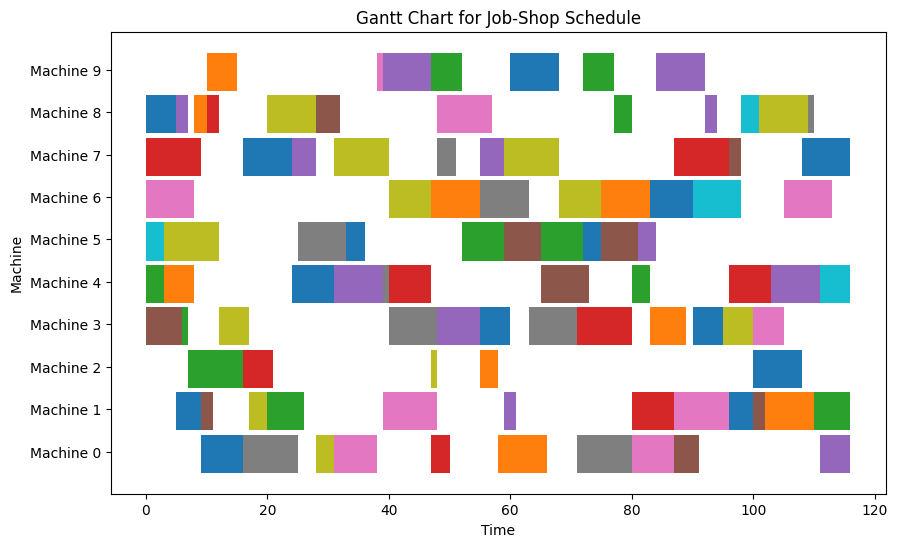

In [4]:
# Plot Gantt Chart
fig, ax = plt.subplots(figsize=(10, 6))

for job, machine, start, end in best_schedule:
    ax.broken_barh([(start, end - start)], (machine * 10, 9), facecolors=f'C{job}')

ax.set_xlabel('Time')
ax.set_ylabel('Machine')
ax.set_yticks([i * 10 + 5 for i in range(machines)])
ax.set_yticklabels([f'Machine {i}' for i in range(machines)])
ax.set_title('Gantt Chart for Job-Shop Schedule')
plt.show()


### Step 4: Integrating Machine Learning for Makespan Prediction

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Generate synthetic data for training (features: chromosome, target: makespan)
def generate_training_data(num_samples, jobs, machines, processing_times):
    data = []
    for _ in range(num_samples):
        chromosome = initialize_population(1, jobs, machines)[0]
        makespan, _ = calculate_schedule(chromosome, jobs, machines, processing_times)
        flattened_chromosome = [job * machines + machine for job, machine in chromosome]  # Flatten the chromosome
        data.append((flattened_chromosome, makespan))
    return data

# Generate synthetic training data
training_data = generate_training_data(500, jobs, machines, processing_times)
X = [item[0] for item in training_data]  # Features: Chromosomes
y = [item[1] for item in training_data]  # Target: Makespan

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    

Mean Absolute Error: 12.282699999999998


### Step 5: Using ML Model for Makespan Prediction in GA

In [6]:
def ml_fitness_function(chromosome, model, jobs, machines):
    # Flatten the chromosome for prediction
    flattened_chromosome = [job * machines + machine for job, machine in chromosome]
    predicted_makespan = model.predict([flattened_chromosome])[0]
    return 1 / predicted_makespan  # Fitness is inversely proportional to predicted makespan

def genetic_algorithm_with_ml(pop_size, generations, jobs, machines, processing_times, model):
    population = initialize_population(pop_size, jobs, machines)

    for gen in range(generations):
        population = sorted(population, key=lambda x: ml_fitness_function(x, model, jobs, machines), reverse=True)
        next_gen = population[:pop_size // 2]  # Select top half

        # Crossover and Mutation
        while len(next_gen) < pop_size:
            parent1, parent2 = random.sample(next_gen, 2)
            child = crossover(parent1, parent2)
            if random.random() < 0.1:  # Mutation probability
                child = mutate(child)
            next_gen.append(child)

        population = next_gen

    # Return the best solution
    best_chromosome = population[0]
    best_makespan, best_schedule = calculate_schedule(best_chromosome, jobs, machines, processing_times)
    return best_chromosome, best_makespan, best_schedule

# Run the Genetic Algorithm with ML
best_solution_ml, best_makespan_ml, best_schedule_ml = genetic_algorithm_with_ml(
    pop_size=20,
    generations=50,
    jobs=jobs,
    machines=machines,
    processing_times=processing_times,
    model=model
)

print("Best Makespan with ML:", best_makespan_ml)
best_schedule_ml
    

Best Makespan with ML: 173


[(3, 5, 0, np.int32(2)),
 (1, 1, 0, np.int32(8)),
 (4, 5, np.int32(2), np.int32(5)),
 (6, 1, np.int32(8), np.int32(17)),
 (4, 9, np.int32(5), np.int32(13)),
 (8, 0, 0, np.int32(3)),
 (5, 0, np.int32(3), np.int32(7)),
 (1, 5, np.int32(8), np.int32(10)),
 (9, 1, np.int32(17), np.int32(24)),
 (6, 7, np.int32(17), np.int32(26)),
 (6, 1, np.int32(26), np.int32(35)),
 (3, 6, np.int32(2), np.int32(6)),
 (0, 5, np.int32(10), np.int32(13)),
 (6, 8, np.int32(35), np.int32(44)),
 (7, 6, np.int32(6), np.int32(14)),
 (4, 3, np.int32(13), np.int32(20)),
 (7, 2, np.int32(14), np.int32(23)),
 (0, 6, np.int32(14), np.int32(21)),
 (6, 5, np.int32(44), np.int32(49)),
 (6, 2, np.int32(49), np.int32(57)),
 (3, 4, np.int32(6), np.int32(13)),
 (3, 9, np.int32(13), np.int32(22)),
 (8, 9, np.int32(22), np.int32(24)),
 (8, 5, np.int32(49), np.int32(58)),
 (0, 8, np.int32(44), np.int32(49)),
 (9, 8, np.int32(49), np.int32(52)),
 (7, 7, np.int32(26), np.int32(29)),
 (6, 7, np.int32(57), np.int32(66)),
 (2, 9, np.

### Step 6: Visualize the Results with a Gantt Chart (Using ML)

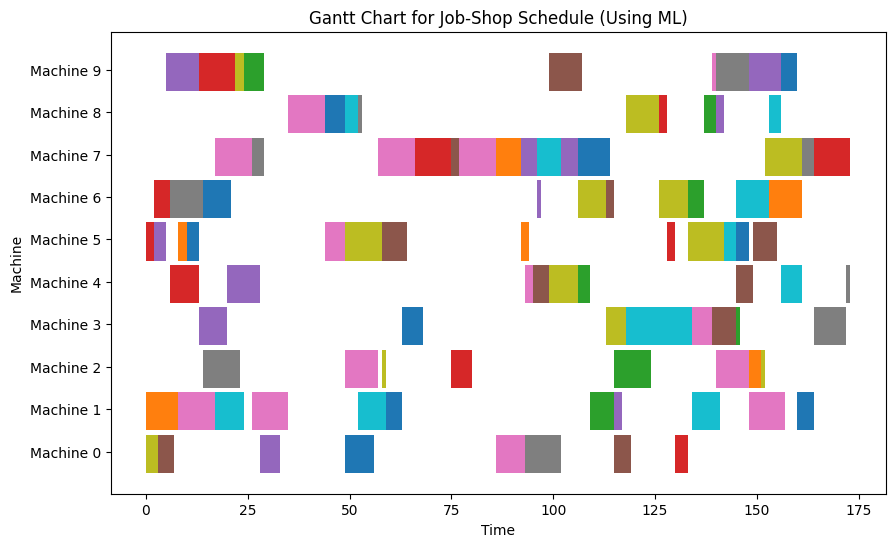

In [7]:
# Plot Gantt Chart for the solution using ML
fig, ax = plt.subplots(figsize=(10, 6))

for job, machine, start, end in best_schedule_ml:
    ax.broken_barh([(start, end - start)], (machine * 10, 9), facecolors=f'C{job}')

ax.set_xlabel('Time')
ax.set_ylabel('Machine')
ax.set_yticks([i * 10 + 5 for i in range(machines)])
ax.set_yticklabels([f'Machine {i}' for i in range(machines)])
ax.set_title('Gantt Chart for Job-Shop Schedule (Using ML)')
plt.show()
    